In [94]:
pip install pandas streamlit mysql-connector-python matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.9 MB/s eta 0:00:00


In [1]:
# Import libraries
import pandas as pd
import sqlite3

In [2]:
# connect to SQLite database
conn = sqlite3.connect('food_wastage_system.db')
cursor = conn.cursor()
print("Connected to SQLite database!")

Connected to SQLite database!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load datasets
providers = pd.read_csv('/content/drive/MyDrive/providers_data.csv')
receivers = pd.read_csv('/content/drive/MyDrive/receivers_data.csv')
food_listings = pd.read_csv('/content/drive/MyDrive/food_listings_data.csv')
claims = pd.read_csv('/content/drive/MyDrive/claims_data.csv')
print("Datasets loaded successfully!")

Datasets loaded successfully!


In [5]:
providers

,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577
...,...,...,...,...,...,...
995,996,"Vasquez, Ruiz and Flowers",Restaurant,"84308 Justin Stravenue\nNew Amberside, NE 53447",Williamview,+1-319-378-7627x0682
996,997,Garza-Williams,Catering Service,"08864 Figueroa Radial Suite 948\nJennaberg, AZ...",East Rossside,001-924-441-3963x746
997,998,Novak Group,Grocery Store,"934 Zachary Run\nMelissamouth, WY 02729",Joshuastad,(903)642-1969x3300
998,999,Moody Ltd,Grocery Store,"17580 Ernest Hills\nLake Michaelmouth, OR 56416",Stevenchester,637.300.3664x4880


In [6]:
# Display first few rows
print("Providers:\n", providers.head())
print("\nReceivers:\n", receivers.head())
print("\nFood Listings:\n", food_listings.head())
print("\nClaims:\n", claims.head())

Providers:
    Provider_ID                         Name           Type  \
0            1             Gonzales-Cochran    Supermarket   
1            2  Nielsen, Johnson and Fuller  Grocery Store   
2            3                 Miller-Black    Supermarket   
3            4   Clark, Prince and Williams  Grocery Store   
4            5               Coleman-Farley  Grocery Store   

                                             Address            City  \
0  74347 Christopher Extensions\nAndreamouth, OK ...     New Jessica   
1           91228 Hanson Stream\nWelchtown, OR 27136     East Sheena   
2  561 Martinez Point Suite 507\nGuzmanchester, W...  Lake Jesusview   
3     467 Bell Trail Suite 409\nPort Jesus, IA 61188     Mendezmouth   
4  078 Matthew Creek Apt. 319\nSaraborough, MA 53978   Valentineside   

                Contact  
0       +1-600-220-0480  
1  +1-925-283-8901x6297  
2      001-517-295-2206  
3      556.944.8935x401  
4          193.714.6577  

Receivers:
    Receiver_I

In [7]:
# Check missing values
print("Missing values in providers:\n", providers.isnull().sum())
print("\nMissing values in receivers:\n", receivers.isnull().sum())
print("\nMissing values in food_listings:\n", food_listings.isnull().sum())
print("\nMissing values in claims:\n", claims.isnull().sum())

Missing values in providers:
 Provider_ID    0
Name           0
Type           0
Address        0
City           0
Contact        0
dtype: int64

Missing values in receivers:
 Receiver_ID    0
Name           0
Type           0
City           0
Contact        0
dtype: int64

Missing values in food_listings:
 Food_ID          0
Food_Name        0
Quantity         0
Expiry_Date      0
Provider_ID      0
Provider_Type    0
Location         0
Food_Type        0
Meal_Type        0
dtype: int64

Missing values in claims:
 Claim_ID       0
Food_ID        0
Receiver_ID    0
Status         0
Timestamp      0
dtype: int64


In [8]:
# Check duplicates
print("\nDuplicates in providers:", providers.duplicated().sum())
print("Duplicates in receivers:", receivers.duplicated().sum())
print("Duplicates in food_listings:", food_listings.duplicated().sum())
print("Duplicates in claims:", claims.duplicated().sum())


Duplicates in providers: 0
Duplicates in receivers: 0
Duplicates in food_listings: 0
Duplicates in claims: 0


In [9]:
# Check data types
print("\nProviders dtypes:\n", providers.dtypes)
print("\nFood Listings dtypes:\n", food_listings.dtypes)
print("\nreceivers:\n" , receivers.dtypes)
print("\nClaims dtypes:\n", claims.dtypes)


Providers dtypes:
 Provider_ID     int64
Name           object
Type           object
Address        object
City           object
Contact        object
dtype: object

Food Listings dtypes:
 Food_ID           int64
Food_Name        object
Quantity          int64
Expiry_Date      object
Provider_ID       int64
Provider_Type    object
Location         object
Food_Type        object
Meal_Type        object
dtype: object

receivers:
 Receiver_ID     int64
Name           object
Type           object
City           object
Contact        object
dtype: object

Claims dtypes:
 Claim_ID        int64
Food_ID         int64
Receiver_ID     int64
Status         object
Timestamp      object
dtype: object


In [10]:
# Convert date columns
food_listings['Expiry_Date'] = pd.to_datetime(food_listings['Expiry_Date'], errors='coerce')
claims['Timestamp'] = pd.to_datetime(claims['Timestamp'], errors='coerce')

In [11]:
# Verify data types
print("\nUpdated Food Listings dtypes:\n", food_listings.dtypes)
print("\nUpdated Claims dtypes:\n", claims.dtypes)


Updated Food Listings dtypes:
 Food_ID                   int64
Food_Name                object
Quantity                  int64
Expiry_Date      datetime64[ns]
Provider_ID               int64
Provider_Type            object
Location                 object
Food_Type                object
Meal_Type                object
dtype: object

Updated Claims dtypes:
 Claim_ID                int64
Food_ID                 int64
Receiver_ID             int64
Status                 object
Timestamp      datetime64[ns]
dtype: object


In [12]:
# Save cleaned datasets
providers.to_csv('/content/cleaned_providers_data.csv', index=False)
receivers.to_csv('/content/cleaned_receivers_data.csv', index=False)
food_listings.to_csv('/content/cleaned_food_listings_data.csv', index=False)
claims.to_csv('/content/cleaned_claims_data.csv', index=False)
print("Cleaned datasets saved!")

Cleaned datasets saved!


In [13]:
# Foreign key checks
invalid_providers = food_listings[~food_listings['Provider_ID'].isin(providers['Provider_ID'])]
print("Invalid Provider_IDs in food_listings:\n", invalid_providers)
invalid_food_ids = claims[~claims['Food_ID'].isin(food_listings['Food_ID'])]
print("\nInvalid Food_IDs in claims:\n", invalid_food_ids)
invalid_receivers = claims[~claims['Receiver_ID'].isin(receivers['Receiver_ID'])]
print("\nInvalid Receiver_IDs in claims:\n", invalid_receivers)

Invalid Provider_IDs in food_listings:
 Empty DataFrame
Columns: [Food_ID, Food_Name, Quantity, Expiry_Date, Provider_ID, Provider_Type, Location, Food_Type, Meal_Type]
Index: []

Invalid Food_IDs in claims:
 Empty DataFrame
Columns: [Claim_ID, Food_ID, Receiver_ID, Status, Timestamp]
Index: []

Invalid Receiver_IDs in claims:
 Empty DataFrame
Columns: [Claim_ID, Food_ID, Receiver_ID, Status, Timestamp]
Index: []


In [14]:
# String consistency checks
print("\nFood_Type values:", food_listings['Food_Type'].unique())
print("Meal_Type values:", food_listings['Meal_Type'].unique())
print("Provider_Type values:", food_listings['Provider_Type'].unique())
print("Status values:", claims['Status'].unique())


Food_Type values: ['Non-Vegetarian' 'Vegan' 'Vegetarian']
Meal_Type values: ['Breakfast' 'Dinner' 'Lunch' 'Snacks']
Provider_Type values: ['Grocery Store' 'Catering Service' 'Restaurant' 'Supermarket']
Status values: ['Pending' 'Cancelled' 'Completed']


In [15]:
# Create tables
cursor.execute('''
    CREATE TABLE IF NOT EXISTS providers (
        Provider_ID INTEGER PRIMARY KEY,
        Name TEXT,
        Type TEXT,
        Address TEXT,
        City TEXT,
        Contact TEXT
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS receivers (
        Receiver_ID INTEGER PRIMARY KEY,
        Name TEXT,
        Type TEXT,
        City TEXT,
        Contact TEXT
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS food_listings (
        Food_ID INTEGER PRIMARY KEY,
        Food_Name TEXT,
        Quantity INTEGER,
        Expiry_Date TEXT,
        Provider_ID INTEGER,
        Provider_Type TEXT,
        Location TEXT,
        Food_Type TEXT,
        Meal_Type TEXT,
        FOREIGN KEY (Provider_ID) REFERENCES providers(Provider_ID)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS claims (
        Claim_ID INTEGER PRIMARY KEY,
        Food_ID INTEGER,
        Receiver_ID INTEGER,
        Status TEXT,
        Timestamp TEXT,
        FOREIGN KEY (Food_ID) REFERENCES food_listings(Food_ID),
        FOREIGN KEY (Receiver_ID) REFERENCES receivers(Receiver_ID)
    )
''')

conn.commit()
print("Tables created successfully!")

Tables created successfully!


In [16]:
# Load providers
providers = pd.read_csv('/content/cleaned_providers_data.csv')
for index, row in providers.iterrows():
    cursor.execute(
        '''
        INSERT INTO providers (Provider_ID, Name, Type, Address, City, Contact)
        VALUES (?, ?, ?, ?, ?, ?)
        ''',
        (row['Provider_ID'], row['Name'], row['Type'], row['Address'], row['City'], row['Contact'])
    )

# Load receivers
receivers = pd.read_csv('/content/cleaned_receivers_data.csv')
for index, row in receivers.iterrows():
    cursor.execute(
        '''
        INSERT INTO receivers (Receiver_ID, Name, Type, City, Contact)
        VALUES (?, ?, ?, ?, ?)
        ''',
        (row['Receiver_ID'], row['Name'], row['Type'], row['City'], row['Contact'])
    )

# Load food_listings
food_listings = pd.read_csv('/content/cleaned_food_listings_data.csv')
for index, row in food_listings.iterrows():
    cursor.execute(
        '''
        INSERT INTO food_listings (Food_ID, Food_Name, Quantity, Expiry_Date, Provider_ID, Provider_Type, Location, Food_Type, Meal_Type)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''',
        (row['Food_ID'], row['Food_Name'], row['Quantity'], row['Expiry_Date'], row['Provider_ID'], row['Provider_Type'], row['Location'], row['Food_Type'], row['Meal_Type'])
    )

# Load claims
claims = pd.read_csv('/content/cleaned_claims_data.csv')
for index, row in claims.iterrows():
    cursor.execute(
        '''
        INSERT INTO claims (Claim_ID, Food_ID, Receiver_ID, Status, Timestamp)
        VALUES (?, ?, ?, ?, ?)
        ''',
        (row['Claim_ID'], row['Food_ID'], row['Receiver_ID'], row['Status'], row['Timestamp'])
    )

conn.commit()
print("Data loaded successfully!")

# Verify data
providers_check = pd.read_sql("SELECT * FROM providers LIMIT 5", conn)
print("Providers sample:\n", providers_check)
conn.close()

Data loaded successfully!
Providers sample:
    Provider_ID                         Name           Type  \
0            1             Gonzales-Cochran    Supermarket   
1            2  Nielsen, Johnson and Fuller  Grocery Store   
2            3                 Miller-Black    Supermarket   
3            4   Clark, Prince and Williams  Grocery Store   
4            5               Coleman-Farley  Grocery Store   

                                             Address            City  \
0  74347 Christopher Extensions\nAndreamouth, OK ...     New Jessica   
1           91228 Hanson Stream\nWelchtown, OR 27136     East Sheena   
2  561 Martinez Point Suite 507\nGuzmanchester, W...  Lake Jesusview   
3     467 Bell Trail Suite 409\nPort Jesus, IA 61188     Mendezmouth   
4  078 Matthew Creek Apt. 319\nSaraborough, MA 53978   Valentineside   

                Contact  
0       +1-600-220-0480  
1  +1-925-283-8901x6297  
2      001-517-295-2206  
3      556.944.8935x401  
4          193.714.

In [17]:
# Connect to SQLite
conn = sqlite3.connect('food_wastage_system.db')

In [18]:
# Query 1: Number of providers per city
q1 = pd.read_sql('''
    SELECT City, COUNT(*) as Provider_Count
    FROM providers
    GROUP BY City
    ORDER BY Provider_Count DESC
''', conn)
print("Q1: Providers per city\n", q1)

Q1: Providers per city
                          City  Provider_Count
0    South Christopherborough               3
1                   New Carol               3
2                 Williamview               2
3           West Lauraborough               2
4            West Christopher               2
..                        ...             ...
958          Alexanderchester               1
959              Aguirreville               1
960                Adamsville               1
961                 Adamsview               1
962                  Adambury               1

[963 rows x 2 columns]


In [19]:
# Query 2: Number of receivers per city
q2 = pd.read_sql('''
    SELECT City, COUNT(*) as Receiver_Count
    FROM receivers
    GROUP BY City
    ORDER BY Receiver_Count DESC
''', conn)
print("\nQ2: Receivers per city\n", q2)


Q2: Receivers per city
                 City  Receiver_Count
0    New Christopher               3
1       Williamsfort               2
2       West Richard               2
3         West James               2
4        Stevenmouth               2
..               ...             ...
961    Alexanderbury               1
962      Aguilarstad               1
963      Aguilarbury               1
964         Adamland               1
965       Aaronshire               1

[966 rows x 2 columns]


In [20]:
# Query 3: Food provider type contributing the most food listings
q3 = pd.read_sql('''
    SELECT Provider_Type, COUNT(*) as Listing_Count
    FROM food_listings
    GROUP BY Provider_Type
    ORDER BY Listing_Count DESC
    LIMIT 3
''', conn)
print("\nQ3: Provider type with most food listings\n", q3)


Q3: Provider type with most food listings
    Provider_Type  Listing_Count
0    Supermarket            267
1     Restaurant            258
2  Grocery Store            243


In [21]:
# Query 4_1: Contact information of providers in a specific city
q4_1 = pd.read_sql('''
    SELECT Name, Contact, Address
    FROM providers
    WHERE City = 'New Jessica'
''', conn)
print("\nQ4_1: Providers in New Jessica \n", q4_1)


Q4_1: Providers in New Jessica 
                Name          Contact  \
0  Gonzales-Cochran  +1-600-220-0480   

                                             Address  
0  74347 Christopher Extensions\nAndreamouth, OK ...  


In [22]:
# Query 4_2: Contact information of providers in a specific city
q4_2 = pd.read_sql('''
    SELECT Name, Contact, Address
    FROM providers
    WHERE City = 'Mendezmouth'
''', conn)
print("\nQ4_2: Providers in  Mendezmouth \n", q4_2)


Q4_2: Providers in  Mendezmouth 
                          Name           Contact  \
0  Clark, Prince and Williams  556.944.8935x401   

                                          Address  
0  467 Bell Trail Suite 409\nPort Jesus, IA 61188  


In [23]:
# Query 5: Receivers with the most food claims
q5 = pd.read_sql('''
    SELECT r.Name, COUNT(c.Claim_ID) as Claim_Count
    FROM receivers r
    JOIN claims c ON r.Receiver_ID = c.Receiver_ID
    GROUP BY r.Receiver_ID, r.Name
    ORDER BY Claim_Count DESC
    LIMIT 8
''', conn)
print("\nQ5: Top receivers by claims\n", q5)


Q5: Top receivers by claims
                 Name  Claim_Count
0       Scott Hunter            5
1  William Frederick            5
2       Matthew Webb            5
3     Anthony Garcia            5
4         Alvin West            4
5    Jennifer Nelson            4
6   Kristina Simpson            4
7    Kristine Martin            4


In [24]:
# Query 6: Total quantity of food available from all providers
q6 = pd.read_sql('''
    SELECT SUM(Quantity) as Total_Quantity
    FROM food_listings
''', conn)
print("\nQ6: Total food quantity\n", q6)


Q6: Total food quantity
    Total_Quantity
0           25794


In [25]:
# Query 7: City with the highest number of food listings
q7 = pd.read_sql('''
    SELECT Location, COUNT(*) as Listing_Count
    FROM food_listings
    GROUP BY Location
    ORDER BY Listing_Count DESC
    LIMIT 1
''', conn)
print("\nQ7: City with most food listings\n", q7)


Q7: City with most food listings
         Location  Listing_Count
0  South Kathryn              6


In [26]:
# Query 8: Most commonly available food types
q8 = pd.read_sql('''
    SELECT Food_Type, COUNT(*) as Listing_Count
    FROM food_listings
    GROUP BY Food_Type
    ORDER BY Listing_Count DESC
''', conn)
print("\nQ8: Most common food types\n", q8)


Q8: Most common food types
         Food_Type  Listing_Count
0      Vegetarian            336
1           Vegan            334
2  Non-Vegetarian            330


In [27]:
# Query 9: Number of claims per food item
q9 = pd.read_sql('''
    SELECT f.Food_Name, COUNT(c.Claim_ID) as Claim_Count
    FROM food_listings f
    LEFT JOIN claims c ON f.Food_ID = c.Food_ID
    GROUP BY f.Food_ID, f.Food_Name
    ORDER BY Claim_Count DESC
''', conn)
print("\nQ9: Claims per food item\n", q9)


Q9: Claims per food item
     Food_Name  Claim_Count
0        Soup            5
1     Chicken            5
2        Fish            5
3        Rice            4
4     Chicken            4
..        ...          ...
995     Dairy            0
996      Soup            0
997     Salad            0
998      Fish            0
999     Salad            0

[1000 rows x 2 columns]


In [28]:
# Query 10: Provider with the highest number of successful (Completed) claims
q10 = pd.read_sql('''
    SELECT p.Name, COUNT(c.Claim_ID) as Completed_Claims
    FROM providers p
    JOIN food_listings f ON p.Provider_ID = f.Provider_ID
    JOIN claims c ON f.Food_ID = c.Food_ID
    WHERE c.Status = 'Completed'
    GROUP BY p.Provider_ID, p.Name
    ORDER BY Completed_Claims DESC
    LIMIT 1
''', conn)
print("\nQ10: Provider with most completed claims\n", q10)


Q10: Provider with most completed claims
           Name  Completed_Claims
0  Barry Group                 5


In [29]:
# Query 11: Percentage of claims by status (Completed, Pending, Canceled)
q11 = pd.read_sql('''
    SELECT
        Status,
        COUNT(*) as Claim_Count,
        (COUNT(*) * 100.0 / (SELECT COUNT(*) FROM claims)) as Percentage
    FROM claims
    GROUP BY Status
    ORDER BY Claim_Count DESC
''', conn)
print("\nQ11: Claim status percentages\n", q11)


Q11: Claim status percentages
       Status  Claim_Count  Percentage
0  Completed          339        33.9
1  Cancelled          336        33.6
2    Pending          325        32.5


In [30]:
# Query 12: Average quantity of food claimed per receiver
q12 = pd.read_sql('''
    SELECT r.Name, AVG(f.Quantity) as Avg_Quantity_Claimed
    FROM receivers r
    JOIN claims c ON r.Receiver_ID = c.Receiver_ID
    JOIN food_listings f ON c.Food_ID = f.Food_ID
    GROUP BY r.Receiver_ID, r.Name
    ORDER BY Avg_Quantity_Claimed DESC
''', conn)
print("\nQ12: Average quantity claimed per receiver\n", q12)


Q12: Average quantity claimed per receiver
                    Name  Avg_Quantity_Claimed
0           Nancy Silva                  50.0
1            Lisa Pitts                  50.0
2       Daniel Williams                  50.0
3          Peggy Knight                  50.0
4    Christopher Wright                  50.0
..                  ...                   ...
619     Corey Rodriguez                   2.0
620      Kenneth Barnes                   2.0
621       John Reynolds                   2.0
622       Joshua Hooper                   1.0
623        Amanda Kline                   1.0

[624 rows x 2 columns]


In [31]:
# Query 13: Meal type claimed the most
q13 = pd.read_sql('''
    SELECT f.Meal_Type, COUNT(c.Claim_ID) as Claim_Count
    FROM food_listings f
    JOIN claims c ON f.Food_ID = c.Food_ID
    GROUP BY f.Meal_Type
    ORDER BY Claim_Count DESC
    LIMIT 1
''', conn)
print("\nQ13: Most claimed meal type\n", q13)


Q13: Most claimed meal type
    Meal_Type  Claim_Count
0  Breakfast          278


In [32]:
# Query 14: Total quantity donated by each provider
q14 = pd.read_sql('''
    SELECT p.Name, SUM(f.Quantity) as Total_Donated
    FROM providers p
    JOIN food_listings f ON p.Provider_ID = f.Provider_ID
    GROUP BY p.Provider_ID, p.Name
    ORDER BY Total_Donated DESC
''', conn)
print("\nQ14: Total quantity donated by provider\n", q14)


Q14: Total quantity donated by provider
                                 Name  Total_Donated
0                        Barry Group            179
1         Evans, Wright and Mitchell            158
2                        Smith Group            150
3                         Nelson LLC            142
4                         Ruiz-Oneal            140
..                               ...            ...
632                   Gonzales-Moore              1
633  Martinez, Armstrong and Carroll              1
634                   Brown and Sons              1
635                        Mcgee PLC              1
636                   Reyes and Sons              1

[637 rows x 2 columns]


In [33]:
# Query 15: Providers with no claims
q15 = pd.read_sql('''
    SELECT p.Name
    FROM providers p
    JOIN food_listings f ON p.Provider_ID = f.Provider_ID
    LEFT JOIN claims c ON f.Food_ID = c.Food_ID
    WHERE c.Claim_ID IS NULL
    GROUP BY p.Provider_ID, p.Name
''', conn)
print("\nQ15: Providers with no claims\n", q15)


Q15: Providers with no claims
                             Name
0    Nielsen, Johnson and Fuller
1                 Coleman-Farley
2                      Ortiz-Lee
3      Hall, Nguyen and Martinez
4       Flores, Jackson and Ford
..                           ...
295      Wilson, Harris and Mayo
296             Williams-Aguirre
297                  Moore Group
298               Garza-Williams
299               Jenkins-Brooks

[300 rows x 1 columns]


In [34]:
# Query 16: Receivers with no claims
q16 = pd.read_sql('''
    SELECT Name
    FROM receivers
    WHERE Receiver_ID NOT IN (SELECT Receiver_ID FROM claims)
''', conn)
print("\nQ16: Receivers with no claims\n", q16)


Q16: Receivers with no claims
                  Name
0         John Romero
1         James Perez
2       Amber Pacheco
3        Jamie Sutton
4    Melissa Castillo
..                ...
371       Becky Smith
372  Timothy Bradshaw
373    Lindsey Wagner
374       James Curry
375   Theodore Briggs

[376 rows x 1 columns]


In [35]:
# Query 17: Claims by meal type and status
q17 = pd.read_sql('''
    SELECT f.Meal_Type, c.Status, COUNT(c.Claim_ID) as Claim_Count
    FROM food_listings f
    JOIN claims c ON f.Food_ID = c.Food_ID
    GROUP BY f.Meal_Type, c.Status
    ORDER BY Claim_Count DESC
''', conn)
print("\nQ17: Claims by meal type and status\n", q17)


Q17: Claims by meal type and status
     Meal_Type     Status  Claim_Count
0   Breakfast  Cancelled           99
1   Breakfast  Completed           95
2       Lunch    Pending           89
3      Snacks  Cancelled           88
4      Dinner  Completed           86
5   Breakfast    Pending           84
6       Lunch  Completed           84
7      Snacks    Pending           78
8       Lunch  Cancelled           77
9      Dinner    Pending           74
10     Snacks  Completed           74
11     Dinner  Cancelled           72


In [36]:
# Query 18: Food listings not claimed
q18 = pd.read_sql('''
    SELECT f.Food_Name, f.Quantity, f.Expiry_Date
    FROM food_listings f
    LEFT JOIN claims c ON f.Food_ID = c.Food_ID
    WHERE c.Claim_ID IS NULL
''', conn)
print("\nQ18: Unclaimed food listings\n", q18)


Q18: Unclaimed food listings
     Food_Name  Quantity Expiry_Date
0        Soup        22  2025-03-24
1      Fruits        15  2025-03-16
2        Soup        14  2025-03-19
3        Rice        49  2025-03-28
4        Rice        41  2025-03-20
..        ...       ...         ...
348     Dairy         6  2025-03-29
349      Soup         8  2025-03-28
350     Salad        17  2025-03-29
351      Fish        15  2025-03-30
352     Salad        18  2025-03-19

[353 rows x 3 columns]


In [37]:
# Query 19: Receivers per city for each meal type
q19 = pd.read_sql('''
    SELECT
        r.City,
        COUNT(DISTINCT CASE WHEN f.Meal_Type = 'Breakfast' THEN r.Receiver_ID END) as Breakfast_Receivers,
        COUNT(DISTINCT CASE WHEN f.Meal_Type = 'Lunch' THEN r.Receiver_ID END) as Lunch_Receivers,
        COUNT(DISTINCT CASE WHEN f.Meal_Type = 'Dinner' THEN r.Receiver_ID END) as Dinner_Receivers,
        COUNT(DISTINCT CASE WHEN f.Meal_Type = 'Snacks' THEN r.Receiver_ID END) as Snacks_Receivers
    FROM receivers r
    JOIN claims c ON r.Receiver_ID = c.Receiver_ID
    JOIN food_listings f ON c.Food_ID = f.Food_ID
    GROUP BY r.City
    ORDER BY Breakfast_Receivers DESC, Lunch_Receivers DESC, Dinner_Receivers DESC, Snacks_Receivers DESC
''', conn)
print("Q19: Receivers per city by meal type\n", q19)

Q19: Receivers per city by meal type
                     City  Breakfast_Receivers  Lunch_Receivers  \
0        New Christopher                    2                1   
1             Smithshire                    2                0   
2        Lake Rebeccaton                    2                0   
3     Christopherchester                    2                0   
4            Lake Daniel                    2                0   
..                   ...                  ...              ...   
602   South Michelleport                    0                0   
603    South Randalltown                    0                0   
604  South Samanthaburgh                    0                0   
605         Tanyachester                    0                0   
606         West Jessica                    0                0   

     Dinner_Receivers  Snacks_Receivers  
0                   0                 0  
1                   1                 2  
2                   1                 0  
3

In [38]:
# Query 20: receiver type claims the most food and type of food
q20 = pd.read_sql('''
    SELECT r.Type, f.Food_Type, SUM(f.Quantity) as Total_Quantity
    FROM receivers r
    JOIN claims c ON r.Receiver_ID = c.Receiver_ID
    JOIN food_listings f ON c.Food_ID = f.Food_ID
    GROUP BY r.Type, f.Food_Type
    ORDER BY Total_Quantity DESC
    LIMIT 1
''', conn)
print("\nQ20: Receiver type with most food and food type\n", q20)


Q20: Receiver type with most food and food type
   Type   Food_Type  Total_Quantity
0  NGO  Vegetarian            2542


In [39]:
# Query 21: List of receivers based on food type and meal type
q21 = pd.read_sql('''
    SELECT r.Name, f.Food_Type, f.Meal_Type, COUNT(c.Claim_ID) as Claim_Count
    FROM receivers r
    JOIN claims c ON r.Receiver_ID = c.Receiver_ID
    JOIN food_listings f ON c.Food_ID = f.Food_ID
    GROUP BY r.Receiver_ID, r.Name, f.Food_Type, f.Meal_Type
    ORDER BY Claim_Count DESC
''', conn)
print("\nQ21: Receivers by food type and meal type\n", q21)


Q21: Receivers by food type and meal type
                 Name   Food_Type  Meal_Type  Claim_Count
0     Christine Bell       Vegan      Lunch            3
1        Johnny Page  Vegetarian      Lunch            2
2      Mary Franklin  Vegetarian     Snacks            2
3    James Castaneda  Vegetarian  Breakfast            2
4         Alvin West  Vegetarian     Dinner            2
..               ...         ...        ...          ...
948   Matthew Curtis  Vegetarian     Snacks            1
949      Amanda Cain  Vegetarian  Breakfast            1
950      Amanda Cain  Vegetarian      Lunch            1
951  Cheyenne Ramsey  Vegetarian     Dinner            1
952     April Miller  Vegetarian  Breakfast            1

[953 rows x 4 columns]


In [40]:
# Q22: Claims by each city
q22 = pd.read_sql('''
    SELECT f.Location, COUNT(c.Claim_ID) as Claim_Count
    FROM food_listings f
    JOIN claims c ON f.Food_ID = c.Food_ID
    GROUP BY f.Location
    ORDER BY Claim_Count DESC
''', conn)
print("\nQ22: Claims by each city\n", q22)


Q22: Claims by each city
              Location  Claim_Count
0    East Heatherport           12
1    Lake Andrewmouth            9
2           Jamesfurt            9
3       South Kathryn            7
4           New Carol            7
..                ...          ...
463      Anthonyshire            1
464    Anthonyborough            1
465     Andersonville            1
466       Amandashire            1
467      Allenborough            1

[468 rows x 2 columns]


In [41]:
# Q23: Providers with highest average quantity per listing
q23 = pd.read_sql('''
    SELECT p.Name, AVG(f.Quantity) as Avg_Quantity
    FROM providers p
    JOIN food_listings f ON p.Provider_ID = f.Provider_ID
    GROUP BY p.Provider_ID, p.Name
    ORDER BY Avg_Quantity DESC
    LIMIT 5
''', conn)
print("\nQ23: Providers with highest average quantity\n", q23)


Q23: Providers with highest average quantity
                               Name  Avg_Quantity
0  Rodriguez, Walker and Singleton          50.0
1           Lucas, Bush and Miller          50.0
2          Horn, Johnson and Moore          50.0
3        Oliver, Cross and Gilbert          50.0
4                      Schmidt Ltd          50.0


In [42]:
# Q24: Percentage of food quantity claimed per food type
q24 = pd.read_sql('''
    SELECT f.Food_Type,
           SUM(f.Quantity) as Total_Quantity,
           SUM(CASE WHEN c.Claim_ID IS NOT NULL THEN f.Quantity ELSE 0 END) * 100.0 / SUM(f.Quantity) as Claimed_Percentage
    FROM food_listings f
    LEFT JOIN claims c ON f.Food_ID = c.Food_ID
    GROUP BY f.Food_Type
''', conn)
print("\nQ24: Percentage of quantity claimed per food type\n", q24)


Q24: Percentage of quantity claimed per food type
         Food_Type  Total_Quantity  Claimed_Percentage
0  Non-Vegetarian           11758           75.242388
1           Vegan           11712           71.337090
2      Vegetarian           11649           75.173835


In [43]:
# Save all query results to CSV
q1.to_csv('/content/query1_providers_per_city.csv', index=False)
q2.to_csv('/content/query2_receivers_per_city.csv', index=False)
q3.to_csv('/content/query3_top_provider_type.csv', index=False)
q4_1.to_csv('/content/query4_1_providers_new_jessica.csv', index=False)
q4_2.to_csv('/content/query4_2_providers_mendezmouth.csv', index=False)
q5.to_csv('/content/query5_top_receivers_claims.csv', index=False)
q6.to_csv('/content/query6_total_food_quantity.csv', index=False)
q7.to_csv('/content/query7_city_most_listings.csv', index=False)
q8.to_csv('/content/query8_common_food_types.csv', index=False)
q9.to_csv('/content/query9_claims_per_food_item.csv', index=False)
q10.to_csv('/content/query10_top_provider_completed_claims.csv', index=False)
q11.to_csv('/content/query11_claim_status_percentage.csv', index=False)
q12.to_csv('/content/query12_avg_quantity_per_receiver.csv', index=False)
q13.to_csv('/content/query13_most_claimed_meal_type.csv', index=False)
q14.to_csv('/content/query14_total_quantity_donated.csv', index=False)
q15.to_csv('/content/query15_providers_no_claims.csv', index=False)
q16.to_csv('/content/query16_receivers_no_claims.csv', index=False)
q17.to_csv('/content/query17_claims_by_meal_status.csv', index=False)
q18.to_csv('/content/query18_unclaimed_food_listings.csv', index=False)
q19.to_csv('/content/query19_receivers_by_meal_type_city.csv', index=False)
q20.to_csv('/content/query20_receiver_type_most_food.csv', index=False)
q21.to_csv('/content/query21_receivers_by_food_meal_type.csv', index=False)
q22.to_csv('/content/query22_claims_by_city.csv', index=False)
q23.to_csv('/content/query23_providers_highest_avg_quantity.csv', index=False)
q24.to_csv('/content/query24_percentage_claimed_food_type.csv', index=False)

In [44]:
# Verify saved files
import os
print("Saved files:", os.listdir('/content/'))

Saved files: ['.config', 'query13_most_claimed_meal_type.csv', 'query4_1_providers_new_jessica.csv', 'query5_top_receivers_claims.csv', 'query6_total_food_quantity.csv', 'query19_receivers_by_meal_type_city.csv', 'query14_total_quantity_donated.csv', 'query11_claim_status_percentage.csv', 'query3_top_provider_type.csv', 'query8_common_food_types.csv', 'food_wastage_system.db', 'query9_claims_per_food_item.csv', 'cleaned_food_listings_data.csv', 'query1_providers_per_city.csv', 'query7_city_most_listings.csv', 'query22_claims_by_city.csv', 'query16_receivers_no_claims.csv', 'cleaned_providers_data.csv', 'query18_unclaimed_food_listings.csv', 'cleaned_claims_data.csv', 'query12_avg_quantity_per_receiver.csv', 'query4_2_providers_mendezmouth.csv', 'query21_receivers_by_food_meal_type.csv', 'query17_claims_by_meal_status.csv', 'query23_providers_highest_avg_quantity.csv', 'query15_providers_no_claims.csv', 'cleaned_receivers_data.csv', 'drive', 'query20_receiver_type_most_food.csv', 'query

**Visualization**

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# function to save and show plot
def save_and_show(plot_name, filename):
    plt.tight_layout()
    plt.savefig(f'/content/{filename}')
    plt.show()
    print(f"Saved {filename}")

/tmp/ipython-input-2802990188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=q1_top, x='City', y='Provider_Count', palette='Blues_d')


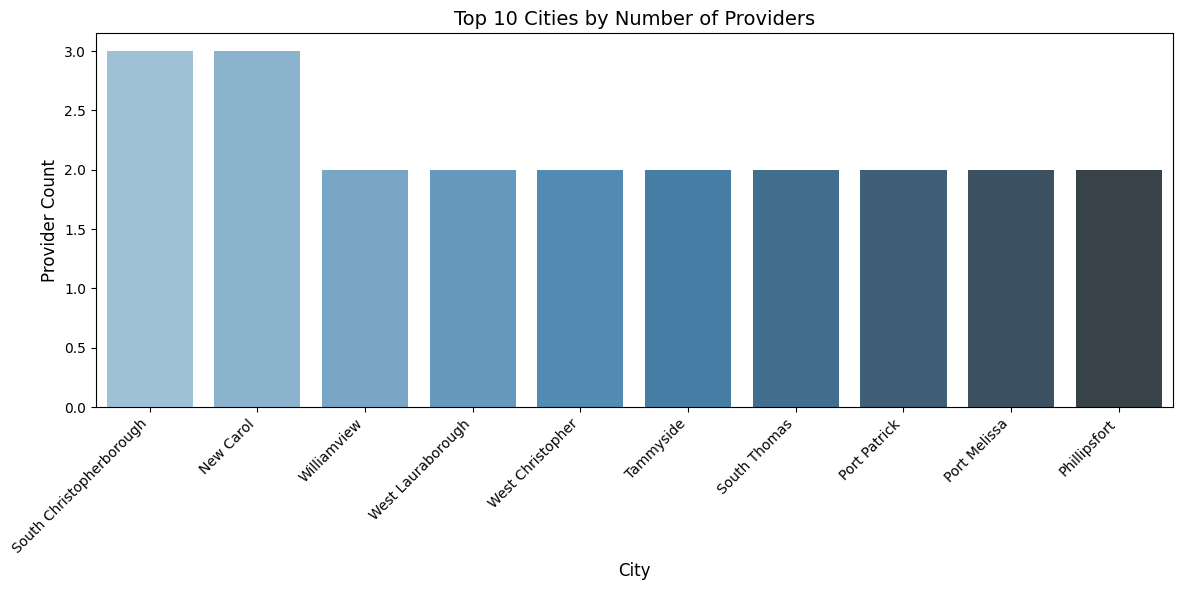

Saved viz1_providers_per_city.png


In [47]:
# Viz 1: Providers per city (Top 10)
q1_top = q1.nlargest(10, 'Provider_Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=q1_top, x='City', y='Provider_Count', palette='Blues_d')
plt.title('Top 10 Cities by Number of Providers', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Provider Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
save_and_show('Providers per City', 'viz1_providers_per_city.png')

/tmp/ipython-input-1695613625.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=q2_top, x='City', y='Receiver_Count', palette='Greens_d')


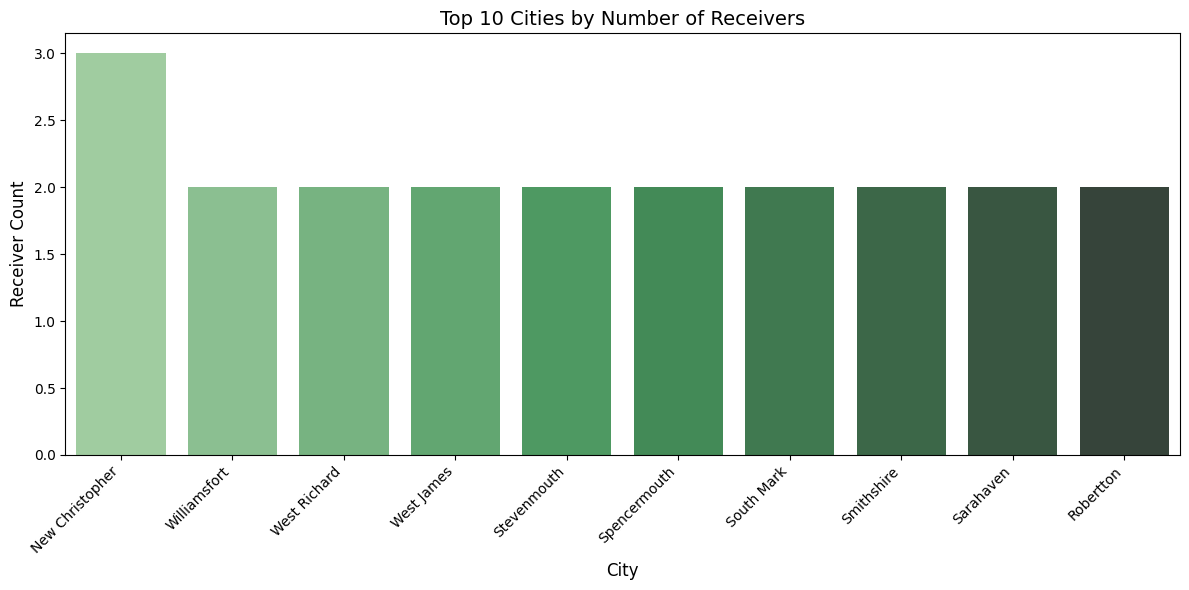

Saved viz2_receivers_per_city.png


In [48]:
# Viz 2: Receivers per city (Top 10)
q2_top = q2.nlargest(10, 'Receiver_Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=q2_top, x='City', y='Receiver_Count', palette='Greens_d')
plt.title('Top 10 Cities by Number of Receivers', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Receiver Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
save_and_show('Receivers per City', 'viz2_receivers_per_city.png')

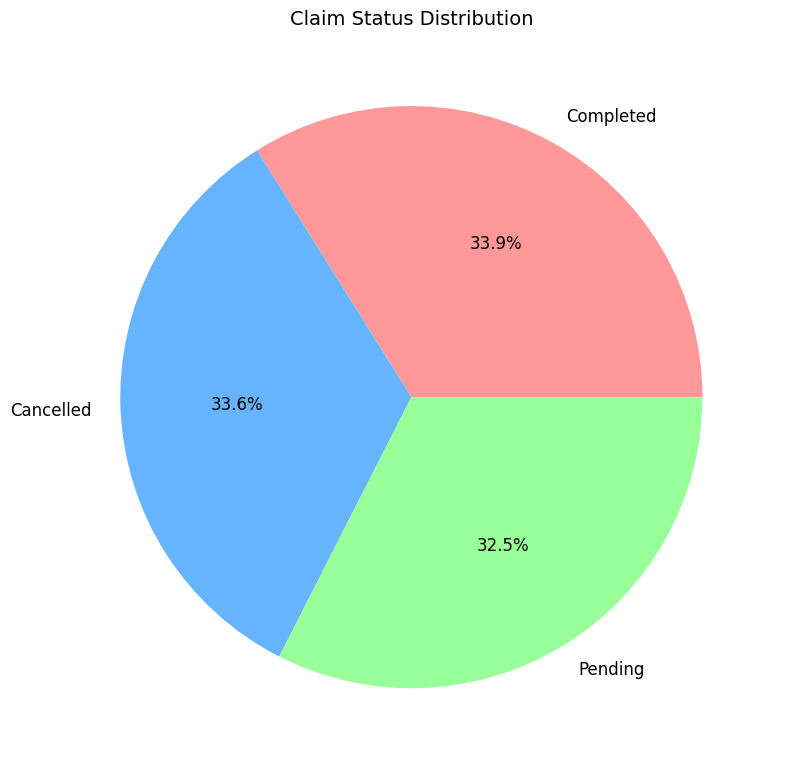

Saved viz3_claim_status_pie.png


In [49]:
# Viz 3: Claim status percentages (Pie chart, already clear)
plt.figure(figsize=(8, 8))
plt.pie(q11['Percentage'], labels=q11['Status'], autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff', '#99ff99'], textprops={'fontsize': 12})
plt.title('Claim Status Distribution', fontsize=14)
save_and_show('Claim Status Pie', 'viz3_claim_status_pie.png')

/tmp/ipython-input-1736631228.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=q8, x='Food_Type', y='Listing_Count', palette='Oranges_d')


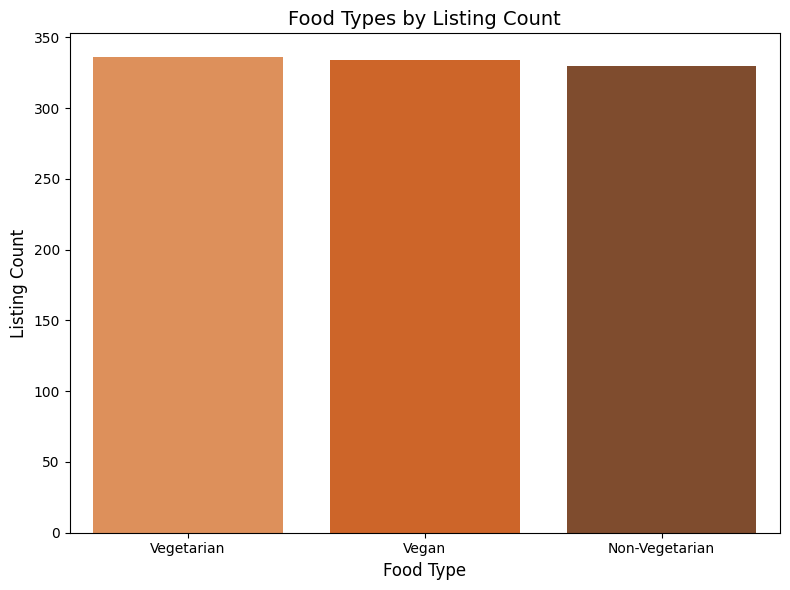

Saved viz4_food_types.png


In [50]:
# Viz 4: Food types by listing count (Should be simple, only 3 food types)
plt.figure(figsize=(8, 6))
sns.barplot(data=q8, x='Food_Type', y='Listing_Count', palette='Oranges_d')
plt.title('Food Types by Listing Count', fontsize=14)
plt.xlabel('Food Type', fontsize=12)
plt.ylabel('Listing Count', fontsize=12)
plt.xticks(fontsize=10)
save_and_show('Food Types', 'viz4_food_types.png')

/tmp/ipython-input-1481959886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=q22_top, x='Location', y='Claim_Count', palette='Reds_d')


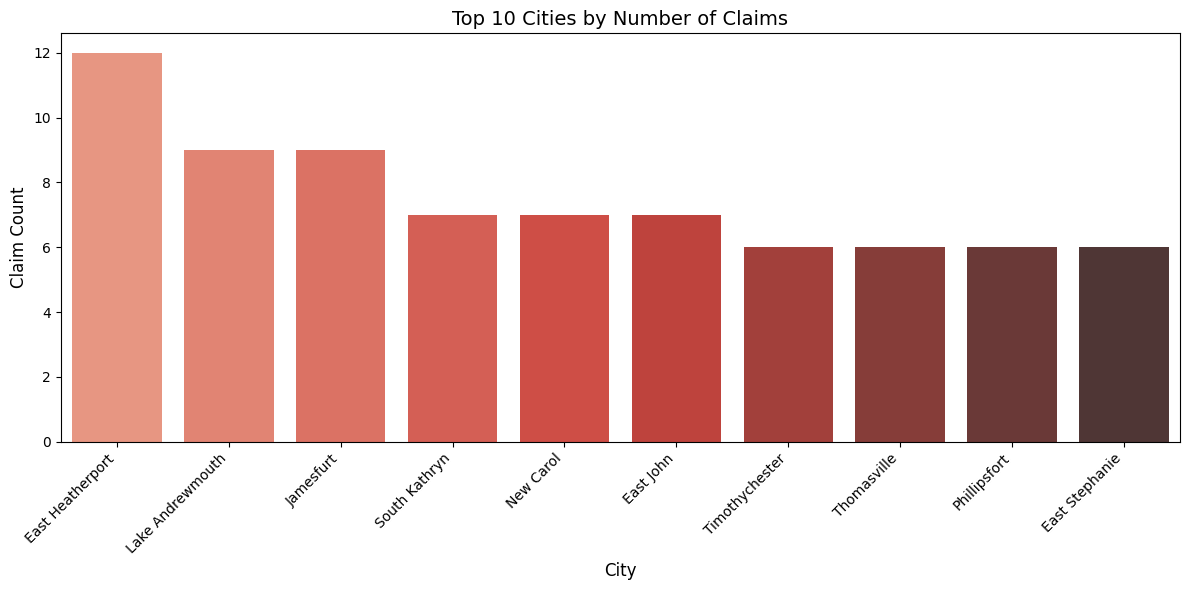

Saved viz5_claims_by_city.png


In [51]:
# Viz 5: Claims by top 10 cities (Q22)
q22_top = q22.nlargest(10, 'Claim_Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=q22_top, x='Location', y='Claim_Count', palette='Reds_d')
plt.title('Top 10 Cities by Number of Claims', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Claim Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
save_and_show('Claims by City', 'viz5_claims_by_city.png')

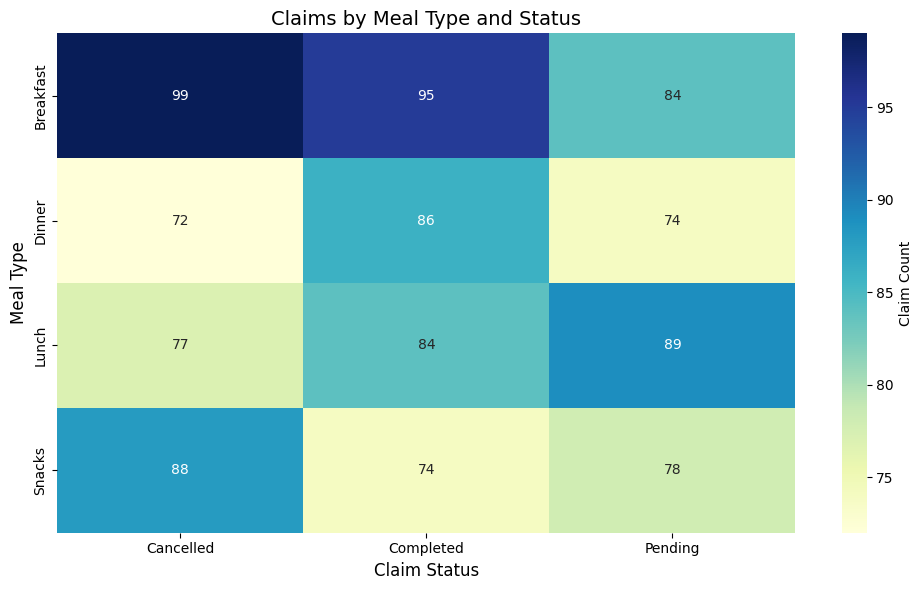

Saved viz6_claims_heatmap.png


In [52]:
# Viz 6: Heatmap of claims by meal type and status (Q18)
q17_pivot = q17.pivot_table(index='Meal_Type', columns='Status',
                           values='Claim_Count', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(q17_pivot, annot=True, fmt='.0f', cmap='YlGnBu',
            cbar_kws={'label': 'Claim Count'})
plt.title('Claims by Meal Type and Status', fontsize=14)
plt.xlabel('Claim Status', fontsize=12)
plt.ylabel('Meal Type', fontsize=12)
save_and_show('Claims Heatmap', 'viz6_claims_heatmap.png')

In [53]:
# Connect to database
conn = sqlite3.connect("food_wastage_system.db")
cursor = conn.cursor()

print("Connected to SQLite database!")

Connected to SQLite database!


- **Implementing CRUD Operation**

##### - Creating CRUD Function

###### 1. CREATE Function

In [54]:
def create_record(table, data):

    columns = ', '.join(data.keys())
    placeholders = ', '.join(['?'] * len(data))
    query = f"INSERT INTO {table} ({columns}) VALUES ({placeholders})"
    cursor.execute(query, tuple(data.values()))
    conn.commit()
    print(f" New record inserted into {table}!")

###### 2. READ Function

In [55]:
def read_records(table, condition=None):

    query = f"SELECT * FROM {table}"
    if condition:
        query += f" WHERE {condition}"
    df = pd.read_sql_query(query, conn)
    return df

###### 3. UPDATE Function

In [56]:
def update_record(table, updates, condition):

    set_clause = ', '.join([f"{col} = ?" for col in updates.keys()])
    query = f"UPDATE {table} SET {set_clause} WHERE {condition}"
    cursor.execute(query, tuple(updates.values()))
    conn.commit()
    print(f" Record(s) updated in {table}!")

###### 4. DELETE Function

In [57]:
def delete_record(table, condition):

    query = f"DELETE FROM {table} WHERE {condition}"
    cursor.execute(query)
    conn.commit()
    print(f" Record(s) deleted from {table}!")

##### - Providers CRUD

In [58]:
# CREATE Example-1
create_record("providers", {
    "Provider_ID": 1001,
    "Name": "Yummy Foods",
    "Type": "Restaurant",
    "Address": "swaroop Nagar",
    "City": "Kanpur",
    "Contact": "9999999788"
})

 New record inserted into providers!


In [59]:
# CREATE Example-2
create_record("providers", {
    "Provider_ID": 1002,
    "Name": "Shukla Store",
    "Type": "Supermarket",
    "Address": "Jankipuram",
    "City": "Lucknow",
    "Contact": "9999762219"
})

 New record inserted into providers!


In [60]:
# CREATE Example-3
create_record("providers", {
    "Provider_ID": 1003,
    "Name": "JJ and Sons",
    "Type": "Grocery Store",
    "Address": "Char Minar",
    "City": "Hyderabad",
    "Contact": "9999942718"
})

 New record inserted into providers!


In [61]:
# READ Example (all records)
print(read_records("providers"))

      Provider_ID                         Name           Type  \
0               1             Gonzales-Cochran    Supermarket   
1               2  Nielsen, Johnson and Fuller  Grocery Store   
2               3                 Miller-Black    Supermarket   
3               4   Clark, Prince and Williams  Grocery Store   
4               5               Coleman-Farley  Grocery Store   
...           ...                          ...            ...   
998           999                    Moody Ltd  Grocery Store   
999          1000               Jenkins-Brooks     Restaurant   
1000         1001                  Yummy Foods     Restaurant   
1001         1002                 Shukla Store    Supermarket   
1002         1003                  JJ and Sons  Grocery Store   

                                                Address            City  \
0     74347 Christopher Extensions\nAndreamouth, OK ...     New Jessica   
1              91228 Hanson Stream\nWelchtown, OR 27136     East Shee

In [62]:
# READ Example (filtered)
print(read_records("providers", "City='Lucknow'"))

   Provider_ID          Name         Type     Address     City     Contact
0         1002  Shukla Store  Supermarket  Jankipuram  Lucknow  9999762219


In [63]:
# READ Example (filtered)
print(read_records("providers", "City='Kanpur'"))

   Provider_ID         Name        Type        Address    City     Contact
0         1001  Yummy Foods  Restaurant  swaroop Nagar  Kanpur  9999999788


In [64]:
# READ Example (filtered)
print(read_records("providers", "City='Hyderabad'"))

   Provider_ID         Name           Type     Address       City     Contact
0         1003  JJ and Sons  Grocery Store  Char Minar  Hyderabad  9999942718


In [65]:
# UPDATE Example
update_record("providers", {"City": "Bangalore"}, "Provider_ID=1001")

 Record(s) updated in providers!


In [66]:
# READ Example (all records)
print(read_records("providers"))

      Provider_ID                         Name           Type  \
0               1             Gonzales-Cochran    Supermarket   
1               2  Nielsen, Johnson and Fuller  Grocery Store   
2               3                 Miller-Black    Supermarket   
3               4   Clark, Prince and Williams  Grocery Store   
4               5               Coleman-Farley  Grocery Store   
...           ...                          ...            ...   
998           999                    Moody Ltd  Grocery Store   
999          1000               Jenkins-Brooks     Restaurant   
1000         1001                  Yummy Foods     Restaurant   
1001         1002                 Shukla Store    Supermarket   
1002         1003                  JJ and Sons  Grocery Store   

                                                Address            City  \
0     74347 Christopher Extensions\nAndreamouth, OK ...     New Jessica   
1              91228 Hanson Stream\nWelchtown, OR 27136     East Shee

In [67]:
# DELETE Example
delete_record("providers", "Provider_ID=1001")

 Record(s) deleted from providers!


In [68]:
# READ Example (all records)
print(read_records("providers"))

      Provider_ID                         Name           Type  \
0               1             Gonzales-Cochran    Supermarket   
1               2  Nielsen, Johnson and Fuller  Grocery Store   
2               3                 Miller-Black    Supermarket   
3               4   Clark, Prince and Williams  Grocery Store   
4               5               Coleman-Farley  Grocery Store   
...           ...                          ...            ...   
997           998                  Novak Group  Grocery Store   
998           999                    Moody Ltd  Grocery Store   
999          1000               Jenkins-Brooks     Restaurant   
1000         1002                 Shukla Store    Supermarket   
1001         1003                  JJ and Sons  Grocery Store   

                                                Address            City  \
0     74347 Christopher Extensions\nAndreamouth, OK ...     New Jessica   
1              91228 Hanson Stream\nWelchtown, OR 27136     East Shee

##### -  Receivers CRUD

In [69]:
# CREATE Example-1
create_record("receivers", {
    "Receiver_ID": 1001,
    "Name": "Community Kitchen",
    "Type": "NGO",
    "City": "Lucknow",
    "Contact": "9998887777"
})

 New record inserted into receivers!


In [70]:
# CREATE Example-2
create_record("receivers", {
    "Receiver_ID": 1002,
    "Name": "Aditi Shukla",
    "Type": "Individual",
    "City": "kanpur",
    "Contact": "9999665544"
})

 New record inserted into receivers!


In [71]:
# CREATE Example-3
create_record("receivers", {
    "Receiver_ID": 1003,
    "Name": "Give and Take",
    "Type": "Shelter",
    "City": "Hyderabad",
    "Contact": "9999112233"
})

 New record inserted into receivers!


In [72]:
# READ all
print(read_records("receivers"))

      Receiver_ID               Name        Type               City  \
0               1       Donald Gomez     Shelter     Port Carlburgh   
1               2       Laurie Ramos  Individual         Lewisburgh   
2               3       Ashley Mckee         NGO  South Randalltown   
3               4         Erika Rose         NGO   South Shaneville   
4               5        John Romero  Individual          Bakerport   
...           ...                ...         ...                ...   
998           999    Cheyenne Ramsey         NGO       Lake Jeffery   
999          1000       April Miller     Shelter      Shelbychester   
1000         1001  Community Kitchen         NGO            Lucknow   
1001         1002       Aditi Shukla  Individual             kanpur   
1002         1003      Give and Take     Shelter          Hyderabad   

                     Contact  
0              (955)922-5295  
1               761.042.1570  
2           691-023-0094x856  
3                 82964

In [73]:
# READ filtered
print(read_records("receivers", "City='Lucknow'"))

   Receiver_ID               Name Type     City     Contact
0         1001  Community Kitchen  NGO  Lucknow  9998887777


In [74]:
# READ filtered
print(read_records("receivers", "City='kanpur'"))

   Receiver_ID          Name        Type    City     Contact
0         1002  Aditi Shukla  Individual  kanpur  9999665544


In [75]:
# UPDATE
update_record("receivers", {"City": "Noida"}, "Receiver_ID=1002")

 Record(s) updated in receivers!


In [76]:
# READ all
print(read_records("receivers"))

      Receiver_ID               Name        Type               City  \
0               1       Donald Gomez     Shelter     Port Carlburgh   
1               2       Laurie Ramos  Individual         Lewisburgh   
2               3       Ashley Mckee         NGO  South Randalltown   
3               4         Erika Rose         NGO   South Shaneville   
4               5        John Romero  Individual          Bakerport   
...           ...                ...         ...                ...   
998           999    Cheyenne Ramsey         NGO       Lake Jeffery   
999          1000       April Miller     Shelter      Shelbychester   
1000         1001  Community Kitchen         NGO            Lucknow   
1001         1002       Aditi Shukla  Individual              Noida   
1002         1003      Give and Take     Shelter          Hyderabad   

                     Contact  
0              (955)922-5295  
1               761.042.1570  
2           691-023-0094x856  
3                 82964

In [77]:
# DELETE
delete_record("receivers", "Receiver_ID=1002")

 Record(s) deleted from receivers!


In [78]:
# READ all
print(read_records("receivers"))

      Receiver_ID               Name        Type               City  \
0               1       Donald Gomez     Shelter     Port Carlburgh   
1               2       Laurie Ramos  Individual         Lewisburgh   
2               3       Ashley Mckee         NGO  South Randalltown   
3               4         Erika Rose         NGO   South Shaneville   
4               5        John Romero  Individual          Bakerport   
...           ...                ...         ...                ...   
997           998    Theodore Briggs  Individual       South Sandra   
998           999    Cheyenne Ramsey         NGO       Lake Jeffery   
999          1000       April Miller     Shelter      Shelbychester   
1000         1001  Community Kitchen         NGO            Lucknow   
1001         1003      Give and Take     Shelter          Hyderabad   

                     Contact  
0              (955)922-5295  
1               761.042.1570  
2           691-023-0094x856  
3                 82964

###### - Food Listings CRUD

In [79]:
# CREATE Example-1
create_record("food_listings", {
    "Food_ID": 1001,
    "Food_Name": "Bread",
    "Quantity": 50,
    "Expiry_Date": "2025-08-20",
    "Provider_ID": 1003,
    "Provider_Type": "Grocery Store",
    "Location": "Lucknow",
    "Food_Type": "Vegetarian",
    "Meal_Type": "Breakfast"

})

 New record inserted into food_listings!


In [80]:
# CREATE Example-2
create_record("food_listings", {
    "Food_ID": 1002,
    "Food_Name": "Soup",
    "Quantity": 20,
    "Expiry_Date": "2025-08-20",
    "Provider_ID": 1002,
    "Provider_Type": "Restaurant",
    "Location": "Kanpur",
    "Food_Type": "Non-Vegetarian",
    "Meal_Type": "Dinner"

})

 New record inserted into food_listings!


In [81]:
# READ all
print(read_records("food_listings"))

      Food_ID Food_Name  Quantity Expiry_Date  Provider_ID     Provider_Type  \
0           1     Bread        43  2025-03-17          110     Grocery Store   
1           2      Soup        22  2025-03-24          791     Grocery Store   
2           3    Fruits        46  2025-03-28          478  Catering Service   
3           4    Fruits        15  2025-03-16          930        Restaurant   
4           5      Soup        14  2025-03-19          279        Restaurant   
...       ...       ...       ...         ...          ...               ...   
997       998    Fruits         6  2025-03-22          444        Restaurant   
998       999     Pasta        15  2025-03-30          702       Supermarket   
999      1000     Salad        18  2025-03-19          155       Supermarket   
1000     1001     Bread        50  2025-08-20         1003     Grocery Store   
1001     1002      Soup        20  2025-08-20         1002        Restaurant   

              Location       Food_Type 

In [82]:
# UPDATE
update_record("food_listings", {"Quantity": 70}, "Food_ID=1001")

 Record(s) updated in food_listings!


In [83]:
# READ all
print(read_records("food_listings"))

      Food_ID Food_Name  Quantity Expiry_Date  Provider_ID     Provider_Type  \
0           1     Bread        43  2025-03-17          110     Grocery Store   
1           2      Soup        22  2025-03-24          791     Grocery Store   
2           3    Fruits        46  2025-03-28          478  Catering Service   
3           4    Fruits        15  2025-03-16          930        Restaurant   
4           5      Soup        14  2025-03-19          279        Restaurant   
...       ...       ...       ...         ...          ...               ...   
997       998    Fruits         6  2025-03-22          444        Restaurant   
998       999     Pasta        15  2025-03-30          702       Supermarket   
999      1000     Salad        18  2025-03-19          155       Supermarket   
1000     1001     Bread        70  2025-08-20         1003     Grocery Store   
1001     1002      Soup        20  2025-08-20         1002        Restaurant   

              Location       Food_Type 

In [84]:
# DELETE
delete_record("food_listings", "Food_ID=1002")

 Record(s) deleted from food_listings!


In [85]:
# READ all
print(read_records("food_listings"))

      Food_ID Food_Name  Quantity Expiry_Date  Provider_ID     Provider_Type  \
0           1     Bread        43  2025-03-17          110     Grocery Store   
1           2      Soup        22  2025-03-24          791     Grocery Store   
2           3    Fruits        46  2025-03-28          478  Catering Service   
3           4    Fruits        15  2025-03-16          930        Restaurant   
4           5      Soup        14  2025-03-19          279        Restaurant   
...       ...       ...       ...         ...          ...               ...   
996       997      Fish        22  2025-03-18           35     Grocery Store   
997       998    Fruits         6  2025-03-22          444        Restaurant   
998       999     Pasta        15  2025-03-30          702       Supermarket   
999      1000     Salad        18  2025-03-19          155       Supermarket   
1000     1001     Bread        70  2025-08-20         1003     Grocery Store   

              Location       Food_Type 

##### - Claims CRUD

In [86]:
# CREATE Example-1
create_record("claims", {
    "Claim_ID": 1001,
    "Food_ID": 1001,
    "Receiver_ID": 1001,
    "Status": "Pending",
    "Timestamp":"2025-08-20 7:30"
})

 New record inserted into claims!


In [87]:
# CREATE Example-1
create_record("claims", {
    "Claim_ID": 1002,
    "Food_ID": 1002,
    "Receiver_ID": 1002,
    "Status": "Completed",
    "Timestamp":"2025-08-20 10:30"
})

 New record inserted into claims!


In [88]:
# READ all
print(read_records("claims"))

      Claim_ID  Food_ID  Receiver_ID     Status            Timestamp
0            1      164          908    Pending  2025-03-05 05:26:00
1            2      353          391  Cancelled  2025-03-11 10:24:00
2            3      626          492  Completed  2025-03-21 00:59:00
3            4       61          933  Cancelled  2025-03-04 09:08:00
4            5      345          229    Pending  2025-03-14 15:17:00
...        ...      ...          ...        ...                  ...
997        998      832          967  Cancelled  2025-03-13 18:00:00
998        999      917           90  Completed  2025-03-01 15:31:00
999       1000      596          950  Cancelled  2025-03-13 12:51:00
1000      1001     1001         1001    Pending      2025-08-20 7:30
1001      1002     1002         1002  Completed     2025-08-20 10:30

[1002 rows x 5 columns]


In [89]:
# UPDATE
update_record("claims", {"Status": "Completed"}, "Claim_ID=1001")

 Record(s) updated in claims!


In [90]:
# READ all
print(read_records("claims"))

      Claim_ID  Food_ID  Receiver_ID     Status            Timestamp
0            1      164          908    Pending  2025-03-05 05:26:00
1            2      353          391  Cancelled  2025-03-11 10:24:00
2            3      626          492  Completed  2025-03-21 00:59:00
3            4       61          933  Cancelled  2025-03-04 09:08:00
4            5      345          229    Pending  2025-03-14 15:17:00
...        ...      ...          ...        ...                  ...
997        998      832          967  Cancelled  2025-03-13 18:00:00
998        999      917           90  Completed  2025-03-01 15:31:00
999       1000      596          950  Cancelled  2025-03-13 12:51:00
1000      1001     1001         1001  Completed      2025-08-20 7:30
1001      1002     1002         1002  Completed     2025-08-20 10:30

[1002 rows x 5 columns]


In [91]:
# Delete
delete_record("claims", "Claim_ID=1002")

 Record(s) deleted from claims!


In [92]:
# READ all
print(read_records("claims"))

      Claim_ID  Food_ID  Receiver_ID     Status            Timestamp
0            1      164          908    Pending  2025-03-05 05:26:00
1            2      353          391  Cancelled  2025-03-11 10:24:00
2            3      626          492  Completed  2025-03-21 00:59:00
3            4       61          933  Cancelled  2025-03-04 09:08:00
4            5      345          229    Pending  2025-03-14 15:17:00
...        ...      ...          ...        ...                  ...
996        997      980          746  Cancelled  2025-03-17 22:04:00
997        998      832          967  Cancelled  2025-03-13 18:00:00
998        999      917           90  Completed  2025-03-01 15:31:00
999       1000      596          950  Cancelled  2025-03-13 12:51:00
1000      1001     1001         1001  Completed      2025-08-20 7:30

[1001 rows x 5 columns]
